# We need to balance the dataset as it is highly imbalanced.
## Let's proceed with the following two methods:
#### 1. Randomly undersample the majority class (non-fraud transactions).
#### 2. SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class (fraud transactions).

### 1. Undersampling the Majority Class 

In [11]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('../data/creditcard.csv')


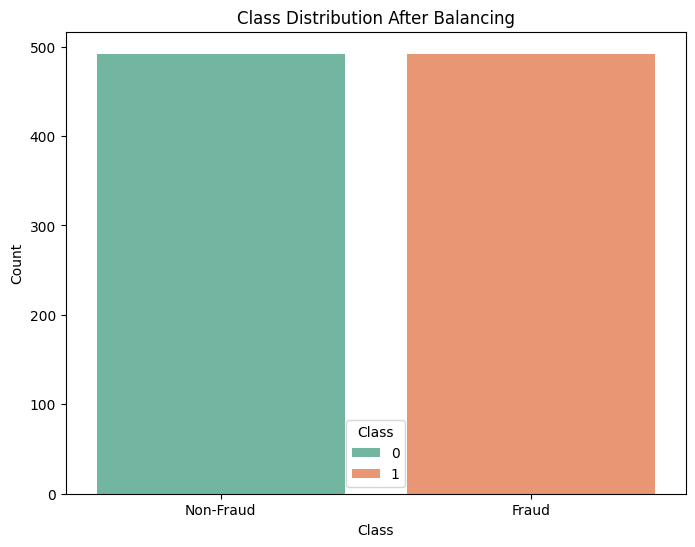

In [8]:
# Balancing the dataset
# The dataset is highly imbalanced, with 0 being the majority class and 1 being the minority class.

df_minority=df[df['Class']==1]
df_majority=df[df['Class']==0]
df_majority_downsampled=df_majority.sample(n=len(df_minority), random_state=42)

df_balanced=pd.concat([df_majority_downsampled, df_minority])

# shuffling the dataset
df_balanced=df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualizing the dataset after balancing class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_balanced, hue='Class', palette='Set2')
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.savefig('../outputs/plots/class_distribution_after_balancing.png')
plt.show()



In [9]:
# Checking the size of the dataset
df_balanced.shape

(984, 31)

In [10]:
# class 1 and 0 count
df_balanced['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [12]:
# Splitting the dataset into features and target variable

X_undersampled=df_balanced.drop('Class', axis=1)
y_undersampled=df_balanced['Class']

# Splitting the dataset into training and testing sets

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled=train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)



In [13]:
# Saving the results
joblib.dump(X_train_undersampled, '../data/undersampled/X_train_undersampled.pkl')
joblib.dump(X_test_undersampled, '../data/undersampled/X_test_undersampled.pkl')
joblib.dump(y_train_undersampled, '../data/undersampled/y_train_undersampled.pkl')
joblib.dump(y_test_undersampled, '../data/undersampled/y_test_undersampled.pkl')

['../data/undersampled/y_test_undersampled.pkl']

### 2. SMOTE (Synthetic Minority Over-sampling Technique)

In [15]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

C:\Users\caaka\AppData\Local\Temp\ipykernel_32160\2263337666.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='Set2')


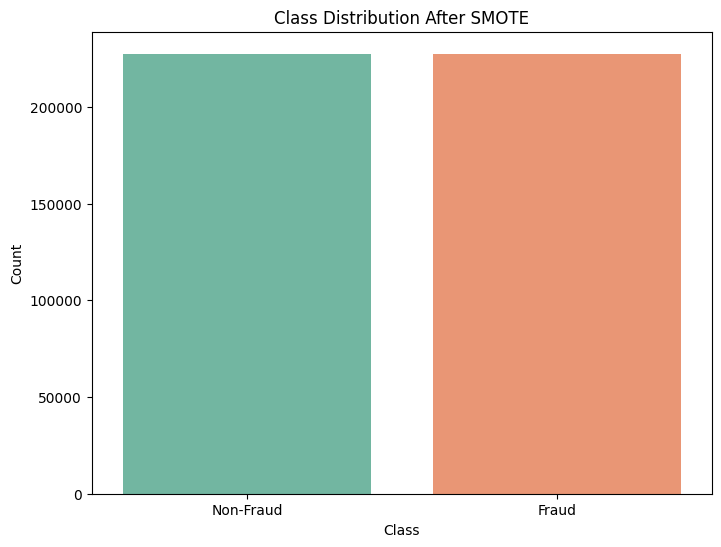

In [19]:
# Reading data
df=pd.read_csv('../data/creditcard.csv')

# splitting the dataset into features and target variable
X=df.drop('Class', axis=1)
y=df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test_smote, y_train, y_test_smote=train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training set
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

# Checking the size of the dataset
X_train_smote.shape, y_train_smote.shape, X_test_smote.shape, y_test_smote.shape
# class 1 and 0 count
y_train_smote.value_counts()

# Visualizing the dataset after applying SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.savefig('../outputs/plots/class_distribution_after_smote.png')
plt.show()





In [20]:
# saving the results
joblib.dump(X_train_smote, '../data/smote/X_train_smote.pkl')
joblib.dump(X_test, '../data/smote/X_test_smote.pkl')
joblib.dump(y_train_smote, '../data/smote/y_train_smote.pkl')
joblib.dump(y_test, '../data/smote/y_test_smote.pkl')

['../data/smote/y_test_smote.pkl']